In [1]:
!nvidia-smi

Sat Jan 28 03:41:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   37C    P5    19W /  77W |   7891MiB /  8192MiB |     40%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Clear unnecessary memory
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()

In [3]:
# from tensorflow.keras.utils import plot_model
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import *
import tensorflow as tf

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
w, h = 32, 32
train_images = train_images.reshape(train_images.shape[0], w, h, 3)
test_images = test_images.reshape(test_images.shape[0], w, h, 3)

In [7]:
classess = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classess_text = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',\
         'frog', 'horse', 'ship', 'truck']

In [8]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)

base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(32, 32, 3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, None, None, 2048)  23564800  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [10]:
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [11]:
history = model.fit(train_images, 
                    train_labels,
                    batch_size = 256,
                    validation_split=0.15,
                    epochs = 30
)

Epoch 1/30
167/167 [==============================] - 16s 32ms/step - loss: 23.2497 - accuracy: 0.2185 - val_loss: 15.0998 - val_accuracy: 0.2373
Epoch 2/30
167/167 [==============================] - 3s 20ms/step - loss: 10.3080 - accuracy: 0.2737 - val_loss: 22.0364 - val_accuracy: 0.1608
Epoch 3/30
167/167 [==============================] - 4s 22ms/step - loss: 9.7787 - accuracy: 0.2852 - val_loss: 20.7756 - val_accuracy: 0.1593
Epoch 4/30
167/167 [==============================] - 4s 23ms/step - loss: 8.1199 - accuracy: 0.3014 - val_loss: 17.7633 - val_accuracy: 0.1980
Epoch 5/30
167/167 [==============================] - 4s 21ms/step - loss: 7.7600 - accuracy: 0.3077 - val_loss: 10.0243 - val_accuracy: 0.2592
Epoch 6/30
167/167 [==============================] - 4s 22ms/step - loss: 6.6471 - accuracy: 0.3170 - val_loss: 11.3694 - val_accuracy: 0.2740
Epoch 7/30
167/167 [==============================] - 3s 21ms/step - loss: 6.7492 - accuracy: 0.3180 - val_loss: 14.3037 - val_accura

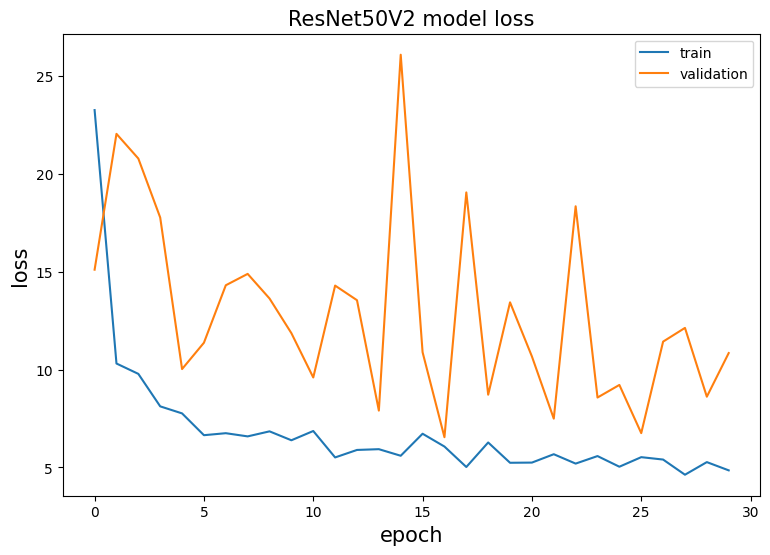

In [12]:
# Loss
plt.figure(figsize = (9, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet50V2 model loss', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

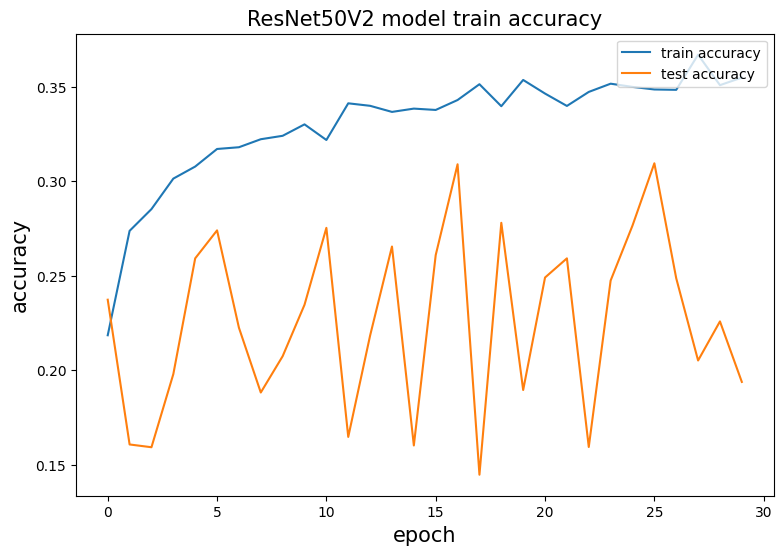

In [13]:
# Accuracy
plt.figure(figsize = (9, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50V2 model train accuracy', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.legend(['train accuracy', 'test accuracy'], loc = 'upper right')
plt.show()

In [14]:
predictions = model.predict(test_images)

In [15]:
test_labels = np.argmax(test_labels, axis = 1)
test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [16]:
train_images = train_images.reshape(train_images.shape[0], w, h, 3)
test_images = test_images.reshape(test_images.shape[0], w, h, 3)


# Cifar's label need to reshape to scalar array
test_labels = test_labels.reshape(10000, )



# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classess_text[predicted_label],
                                100*np.max(predictions_array),
                                classess_text[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

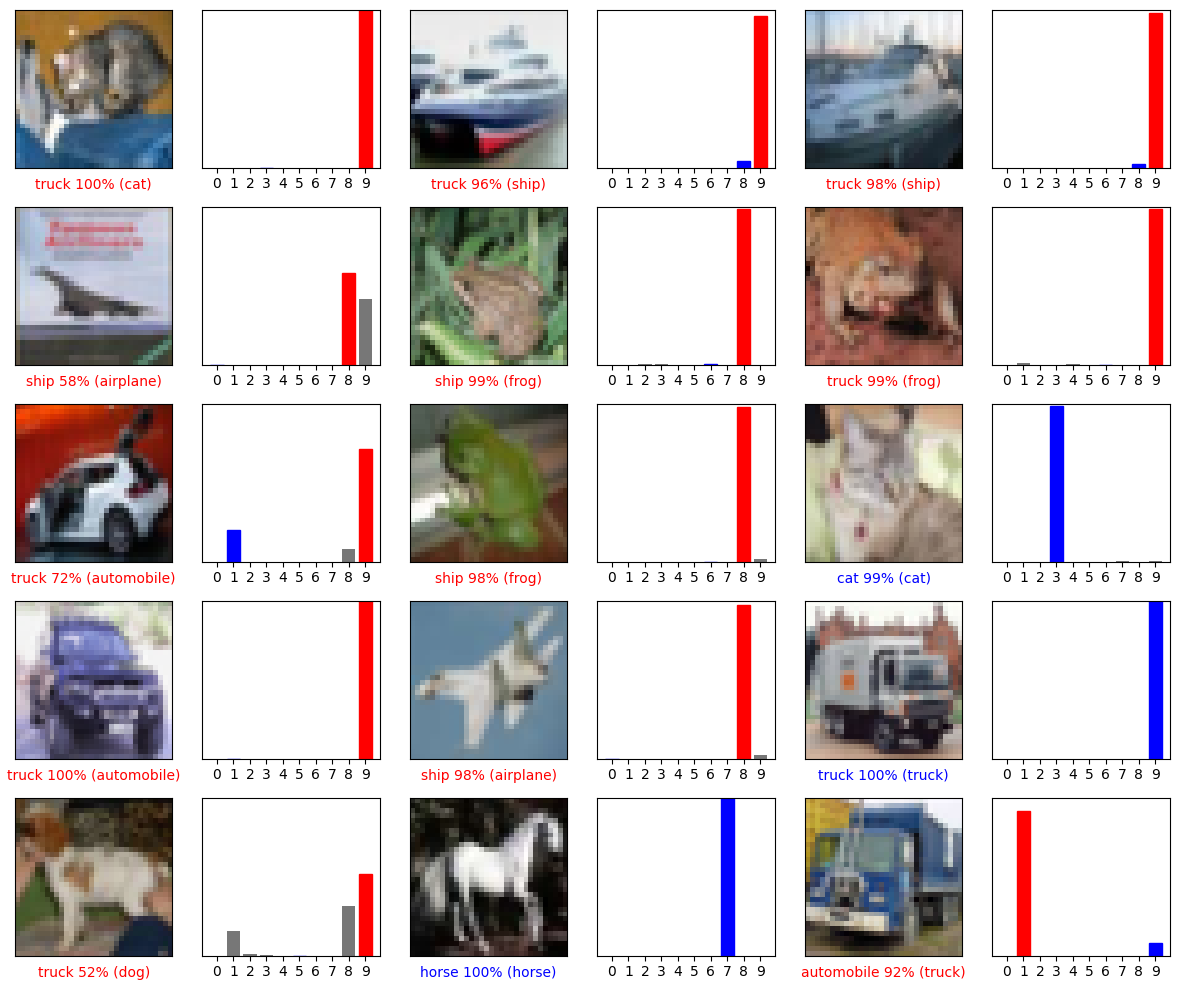

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Fine Tuning Model

In [18]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-50]:
  layer.trainable = False

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
              metrics=["accuracy"])

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, None, None, 2048)  23564800  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 16,372,746
Non-trainable params: 7,212,544
_________________________________________________________________


In [20]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [21]:
for layer in model.layers:
  print(layer.trainable)

True
True
True
True


In [22]:
history_tunning = model.fit(train_images, 
                    train_labels,
                    batch_size = 256,
                    validation_split=0.15,
                    epochs = 30
)

Epoch 1/30
167/167 [==============================] - 13s 41ms/step - loss: 2.1740 - accuracy: 0.2234 - val_loss: 2.1503 - val_accuracy: 0.2084
Epoch 2/30
167/167 [==============================] - 5s 30ms/step - loss: 1.8188 - accuracy: 0.3515 - val_loss: 1.8971 - val_accuracy: 0.3291
Epoch 3/30
167/167 [==============================] - 5s 30ms/step - loss: 1.6644 - accuracy: 0.4082 - val_loss: 1.7057 - val_accuracy: 0.3895
Epoch 4/30
167/167 [==============================] - 5s 30ms/step - loss: 1.5825 - accuracy: 0.4376 - val_loss: 1.6759 - val_accuracy: 0.4085
Epoch 5/30
167/167 [==============================] - 6s 34ms/step - loss: 1.4890 - accuracy: 0.4672 - val_loss: 1.6401 - val_accuracy: 0.4259
Epoch 6/30
167/167 [==============================] - 5s 32ms/step - loss: 1.4433 - accuracy: 0.4874 - val_loss: 1.6154 - val_accuracy: 0.4305
Epoch 7/30
167/167 [==============================] - 5s 33ms/step - loss: 1.3294 - accuracy: 0.5276 - val_loss: 1.6389 - val_accuracy: 0.426

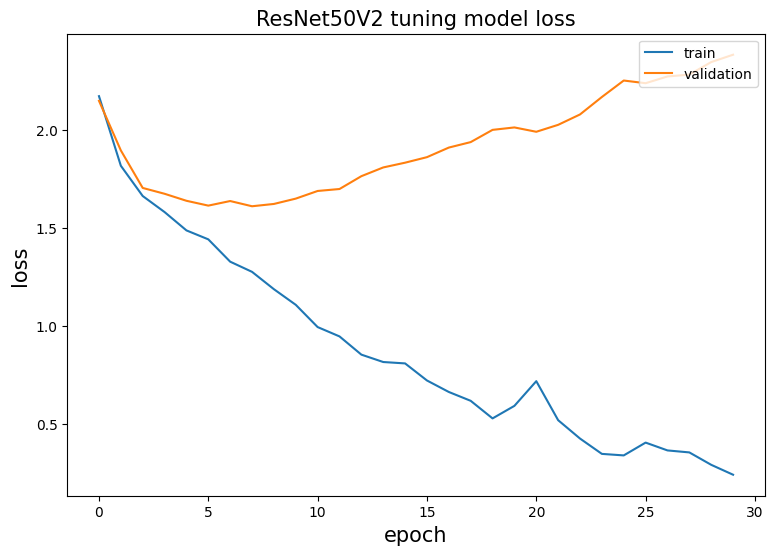

In [23]:
# Loss
plt.figure(figsize = (9, 6))
plt.plot(history_tunning.history['loss'])
plt.plot(history_tunning.history['val_loss'])
plt.title('ResNet50V2 tuning model loss', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

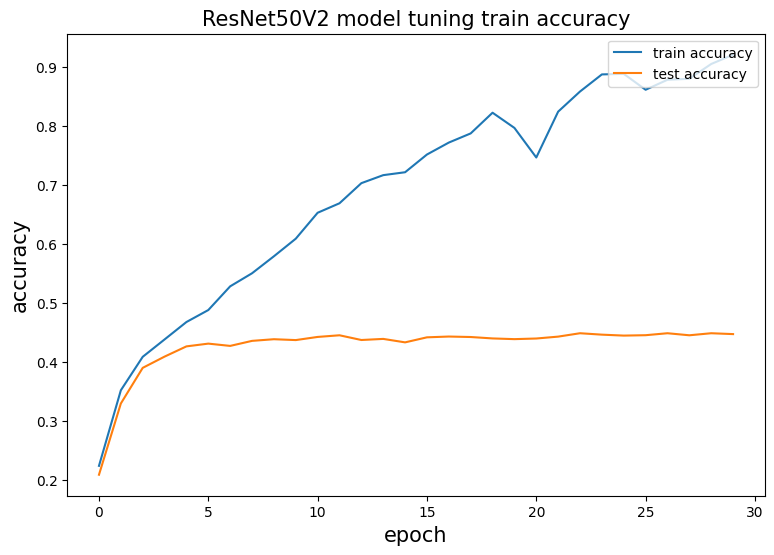

In [24]:
# Accuracy
plt.figure(figsize = (9, 6))
plt.plot(history_tunning.history['accuracy'])
plt.plot(history_tunning.history['val_accuracy'])
plt.title('ResNet50V2 model tuning train accuracy', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.legend(['train accuracy', 'test accuracy'], loc = 'upper right')
plt.show()

In [25]:
predictions = model.predict(test_images)

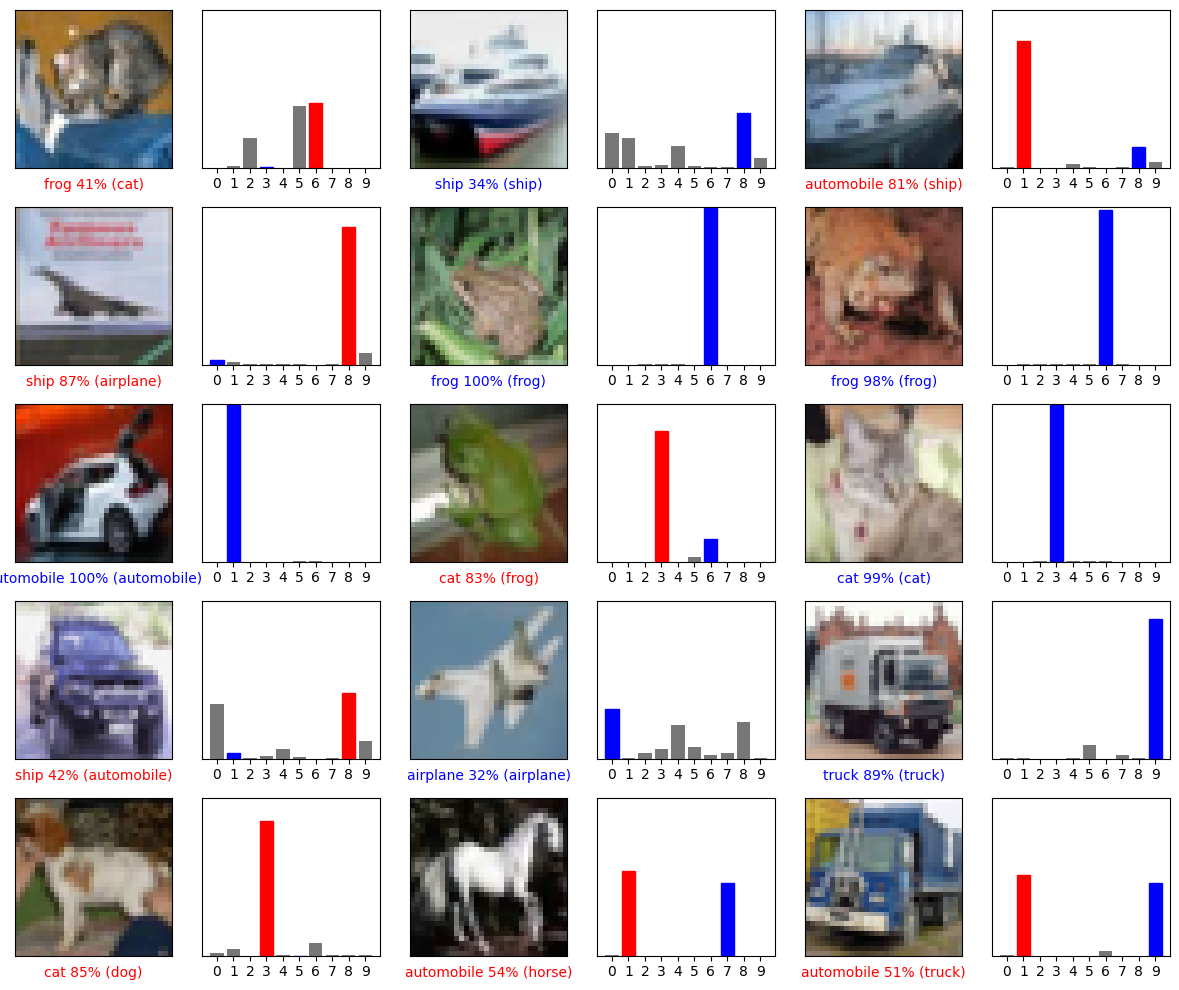

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()